In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, structural_similarity

In [42]:
# 1. Загрузка изображения в оттенках серого
image = cv2.imread('sar_1_gray.jpg')

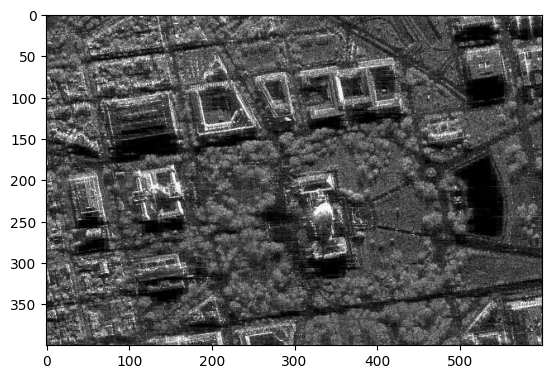

In [43]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")
plt.show()

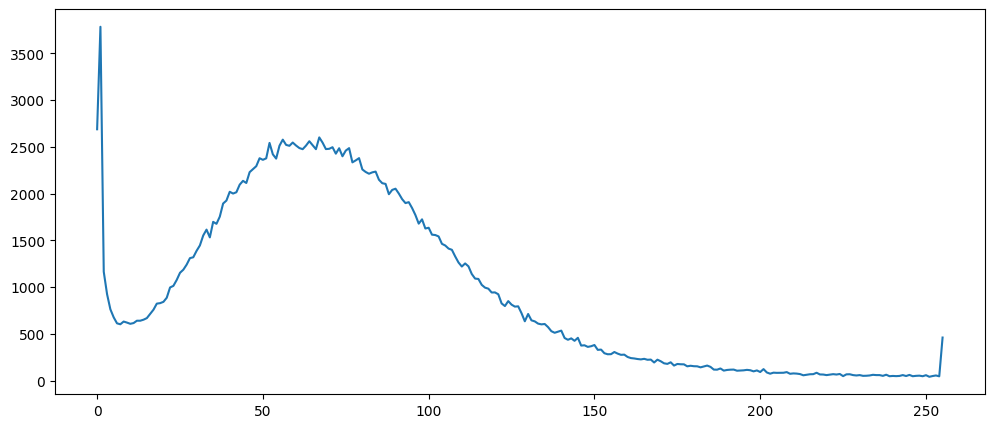

In [44]:
# 2. Построение гистограммы
plt.figure(figsize=(12, 5))
histSize = 256
histRange = (0, 256)
accumulate = False
hist = cv2.calcHist([image_gray], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(hist)

In [45]:
plt.show()

In [46]:
# 3. Гамма-коррекция
def gamma_correction(image, gamma=1.0):
    # Нормализуем изображение и применяем гамма-коррекцию
    image_normalized = image / 255.0
    gamma_corrected = np.power(image_normalized, gamma)
    return np.uint8(gamma_corrected * 255)

In [47]:
# Применяем гамма-коррекцию с разными параметрами
gamma_05 = gamma_correction(image_gray, 0.5)  # gamma < 1
gamma_15 = gamma_correction(image_gray, 1.5)  # gamma > 1

In [48]:
# Гистограммы для гамма-коррекции
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

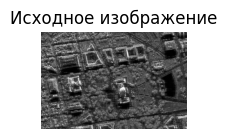

In [49]:
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

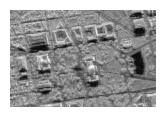

In [50]:
plt.subplot(1, 3, 2)
plt.imshow(gamma_05, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

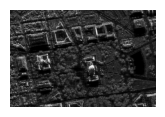

In [51]:
plt.subplot(1, 3, 3)
plt.imshow(gamma_15, cmap='gray')
plt.axis('off')

In [52]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [53]:
# 4. Сравнение изображений
# MSE - среднеквадратичная ошибка, измеряет среднюю величину ошибки между пикселями
# SSIM - индекс структурного сходства, измеряет воспринимаемое качество и структурное сходство
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

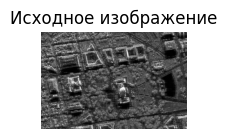

In [54]:
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

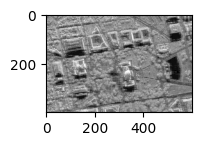

In [55]:
# Гамма = 0.5
plt.subplot(1, 3, 2)
plt.imshow(gamma_05, cmap='gray')

In [56]:
# MSE и SSIM
mse_05 = mean_squared_error(image_gray, gamma_05)
ssim_05 = structural_similarity(image_gray, gamma_05)

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

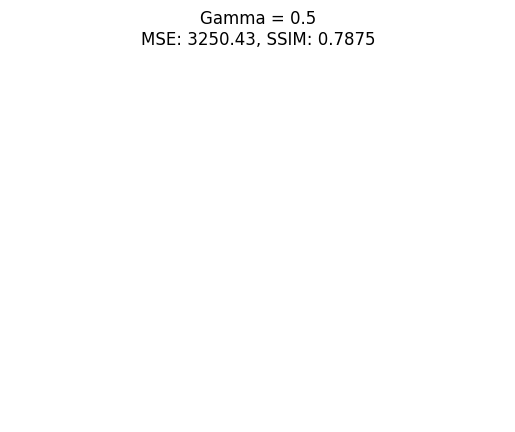

In [57]:
plt.title(f'Gamma = 0.5\nMSE: {mse_05:.2f}, SSIM: {ssim_05:.4f}')
plt.axis('off')

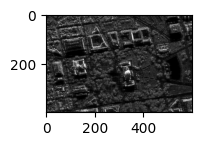

In [58]:
# Гамма = 1.5
plt.subplot(1, 3, 3)
plt.imshow(gamma_15, cmap='gray')

In [59]:
# MSE и SSIM
mse_15 = mean_squared_error(image_gray, gamma_15)
ssim_15 = structural_similarity(image_gray, gamma_15)

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

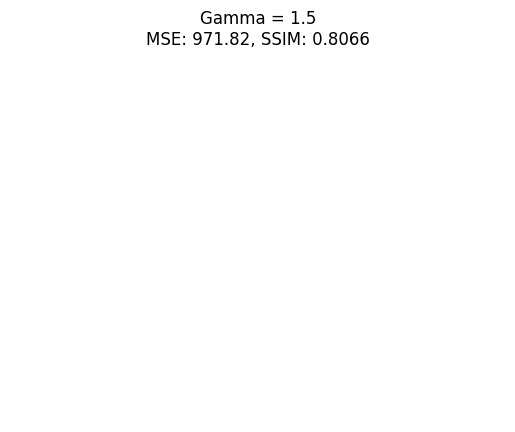

In [60]:
plt.title(f'Gamma = 1.5\nMSE: {mse_15:.2f}, SSIM: {ssim_15:.4f}')
plt.axis('off')

In [61]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [62]:
# 5. Статистическая цветокоррекция на основе eq_gray
eq_gray = cv2.equalizeHist(image_gray)

In [63]:
def statistical_correction(image, reference_image):
    current_mean = np.mean(image)  # средняя яркость всех пикселей
    current_std = np.std(image)  # мера контрастности

    ref_mean = np.mean(reference_image)
    ref_std = np.std(reference_image)

    corrected = (image - current_mean) * (ref_std / current_std) + ref_mean

    corrected = np.clip(corrected, 0, 255)

    return corrected.astype(np.uint8)

In [64]:
image_stat_corrected = statistical_correction(image_gray, eq_gray)

In [65]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

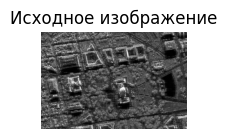

In [66]:
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

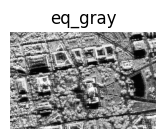

In [67]:
plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap='gray')
plt.title('eq_gray')
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

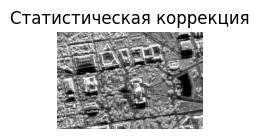

In [68]:
plt.subplot(1, 3, 3)
plt.imshow(image_stat_corrected, cmap='gray')
plt.title('Статистическая коррекция')
plt.axis('off')

In [69]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [70]:
# Сравнение статистической коррекции
mse_stat = mean_squared_error(image_gray, image_stat_corrected)
ssim_stat = structural_similarity(image_gray, image_stat_corrected)

In [71]:
print("Сравнение статистической коррекции:")
print(f"MSE: {mse_stat:.4f}")
print(f"SSIM: {ssim_stat:.4f}")
print()

Сравнение статистической коррекции:
MSE: 2946.7009
SSIM: 0.7862



In [72]:
# 6. Пороговая фильтрация
thresholds = [0, 100, 177, 200]

In [73]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

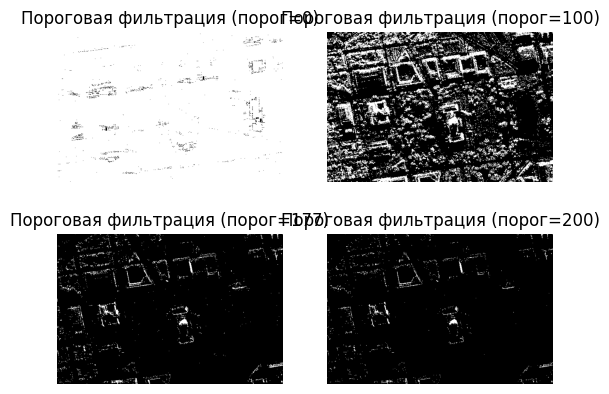

In [74]:
for i, threshold_value in enumerate(thresholds):
    _, thresh1 = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)

    plt.subplot(2, 2, i + 1)
    plt.imshow(thresh1, cmap='gray')
    plt.title(f'Пороговая фильтрация (порог={threshold_value})')
    plt.axis('off')

In [75]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [76]:
test_threshold = 100

In [77]:
methods = [
    ('THRESH_BINARY', cv2.THRESH_BINARY),
    ('THRESH_BINARY_INV', cv2.THRESH_BINARY_INV),
    ('THRESH_TRUNC', cv2.THRESH_TRUNC),
]

In [78]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

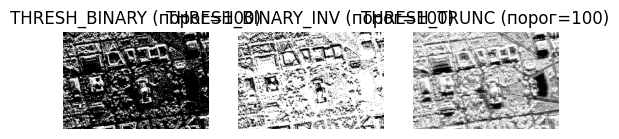

In [79]:
for i, (method_name, method_type) in enumerate(methods):
    _, result = cv2.threshold(image_gray, test_threshold, 255, method_type)

    plt.subplot(1, 3, i + 1)
    plt.imshow(result, cmap='gray')
    plt.title(f'{method_name} (порог={test_threshold})')
    plt.axis('off')

In [80]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>